In [2]:
import pandas as pd

#

# Load dataset

In [3]:
from sklearn.model_selection import train_test_split

all_df = pd.read_csv('train.csv')
df, df_test = train_test_split(all_df, stratify=all_df['Credit_Score'])

df.sample()

C:\Users\Татьяна\AppData\Local\Temp\ipykernel_15280\2449627598.py:3: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  all_df = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
19080,0x85ce,CUS_0x9c22,January,Laue,30,552-02-1881,Developer,11203.125,918.59375,8,...,Standard,954.43,25.346362,13 Years and 4 Months,Yes,35.810287,74.11036814860724,Low_spent_Large_value_payments,251.93872025215512,Standard


In [3]:
df.select_dtypes('object').nunique()

ID                         75000
Customer_ID                12500
Month                          8
Name                       10138
Age                         1379
SSN                        12499
Occupation                    16
Annual_Income              17585
Num_of_Loan                  324
Type_of_Loan                6260
Num_of_Delayed_Payment       607
Changed_Credit_Limit        4214
Credit_Mix                     4
Outstanding_Debt           12930
Credit_History_Age           404
Payment_of_Min_Amount          3
Amount_invested_monthly    68319
Payment_Behaviour              7
Monthly_Balance            74104
Credit_Score                   3
dtype: int64

In [4]:
print(df.iloc[0])

ID                                                   0x1d27a
Customer_ID                                       CUS_0x20f3
Month                                                January
Name                                                  Gavind
Age                                                       35
SSN                                              898-99-9373
Occupation                                         Architect
Annual_Income                                       20344.02
Monthly_Inhand_Salary                               1950.335
Num_Bank_Accounts                                          3
Num_Credit_Card                                            3
Interest_Rate                                             33
Num_of_Loan                                                2
Type_of_Loan                Not Specified, and Mortgage Loan
Delay_from_due_date                                        6
Num_of_Delayed_Payment                                    19
Changed_Credit_Limit    

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75000 entries, 75856 to 20275
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        75000 non-null  object 
 1   Customer_ID               75000 non-null  object 
 2   Month                     75000 non-null  object 
 3   Name                      67513 non-null  object 
 4   Age                       75000 non-null  object 
 5   SSN                       75000 non-null  object 
 6   Occupation                75000 non-null  object 
 7   Annual_Income             75000 non-null  object 
 8   Monthly_Inhand_Salary     63610 non-null  float64
 9   Num_Bank_Accounts         75000 non-null  int64  
 10  Num_Credit_Card           75000 non-null  int64  
 11  Interest_Rate             75000 non-null  int64  
 12  Num_of_Loan               75000 non-null  object 
 13  Type_of_Loan              66393 non-null  object 
 14  Delay_f

In [6]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         7487
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       11390
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                 8607
Delay_from_due_date             0
Num_of_Delayed_Payment       5239
Changed_Credit_Limit            0
Num_Credit_Inquiries         1505
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           6778
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      3324
Payment_Behaviour               0
Monthly_Balance               892
Credit_Score                    0
dtype: int64

In [7]:
df.shape

(75000, 28)

# Processing

In [22]:
target = 'Credit_Score'

numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Delay_from_due_date',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Monthly_Balance',
]

numerical_exp_columns = [
    'Annual_Income',
    'Amount_invested_monthly',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Num_Credit_Inquiries',
    'Interest_Rate',
    'Total_EMI_per_month',
]

categorical_columns = [
    'Credit_Mix',
    'Month',
    'Payment_Behaviour',
    'Payment_of_Min_Amount',
    'Occupation',
]
many_categories = [
    'Type_of_Loan',
    'Credit_History_Age',
]

useless = [
    'Customer_ID',
    'ID',
    'Name',
    'SSN',
]

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Monthly_Inhand_Salary'}>,
        <AxesSubplot:title={'center':'Delay_from_due_date'}>],
       [<AxesSubplot:title={'center':'Changed_Credit_Limit'}>,
        <AxesSubplot:title={'center':'Outstanding_Debt'}>,
        <AxesSubplot:title={'center':'Credit_Utilization_Ratio'}>],
       [<AxesSubplot:title={'center':'Monthly_Balance'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

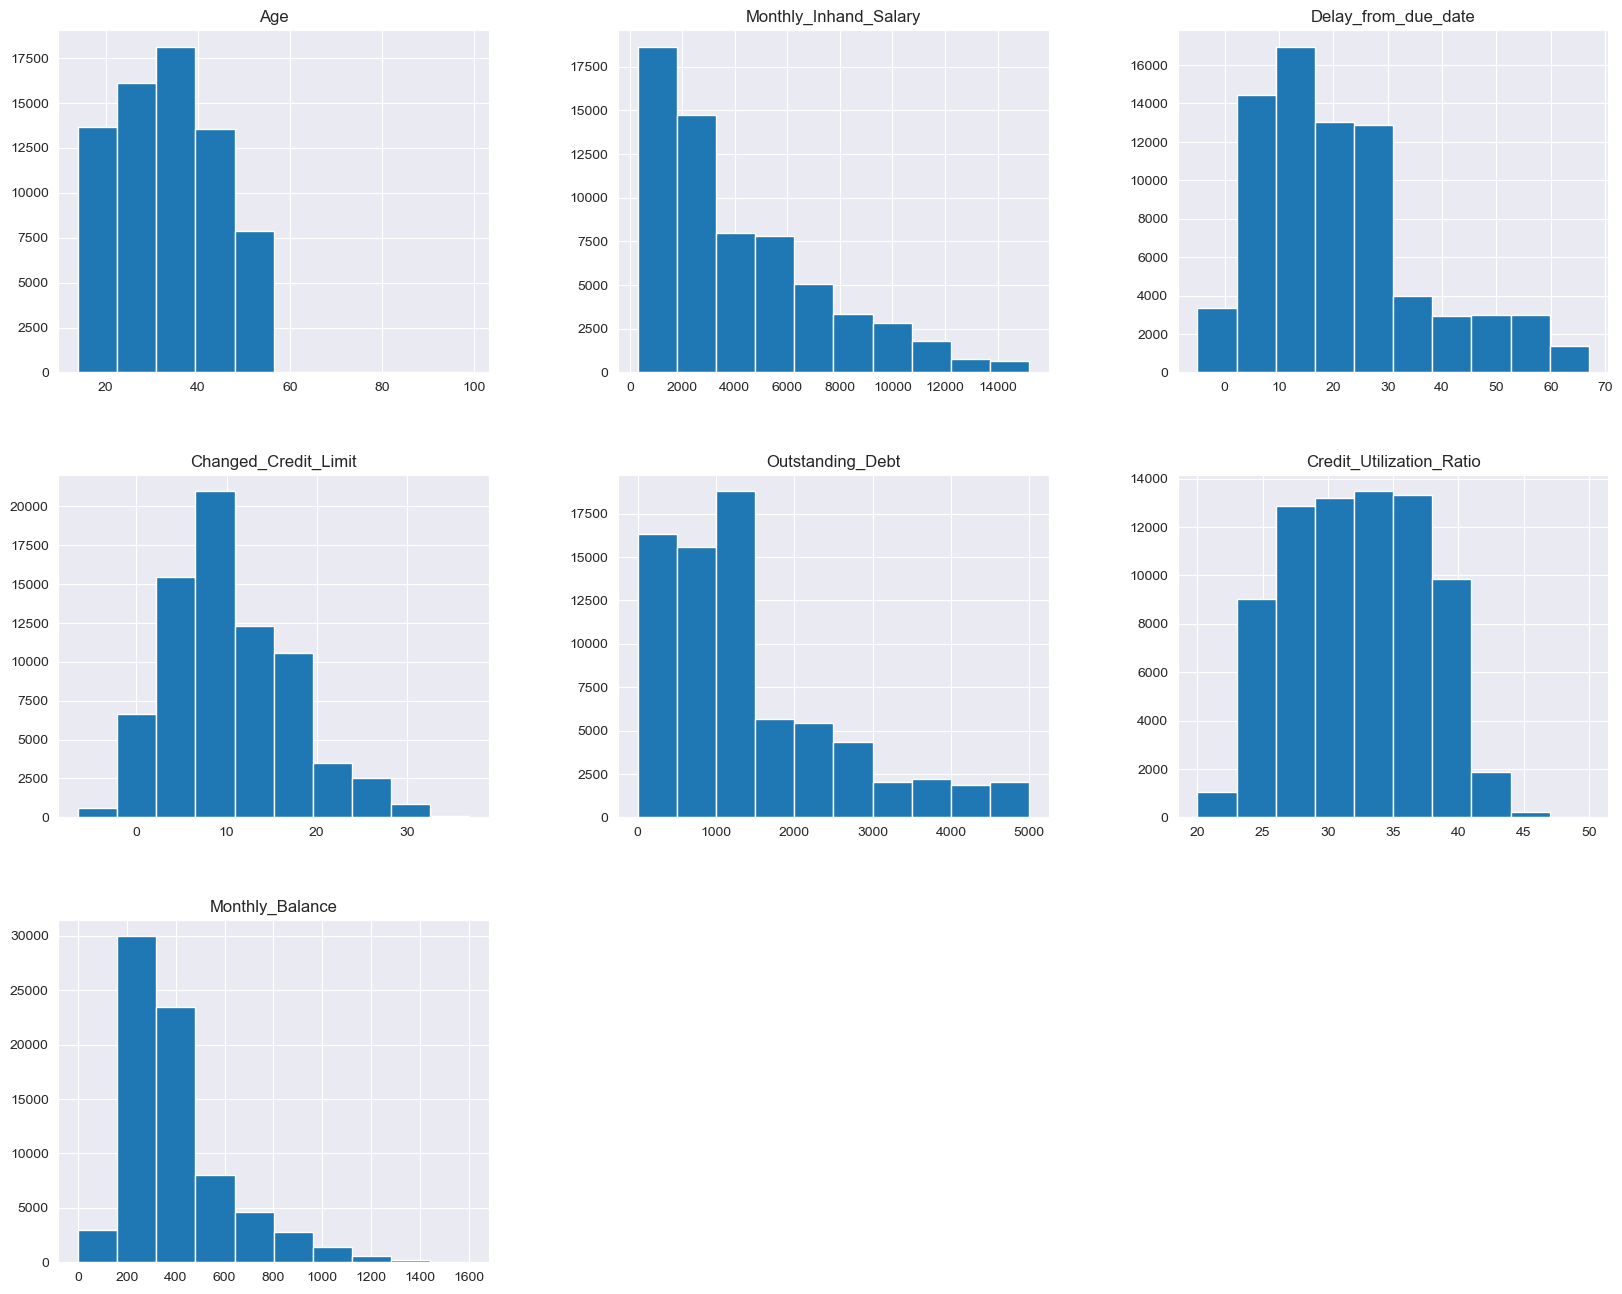

In [23]:
from functools import partial

df[numerical_columns].apply(partial(pd.to_numeric, errors='coerce')).hist(figsize=[20, 16])

array([[<Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>],
       [<Axes: title={'center': 'Num_Credit_Inquiries'}>,
        <Axes: title={'center': 'Interest_Rate'}>],
       [<Axes: title={'center': 'Total_EMI_per_month'}>, <Axes: >]],
      dtype=object)

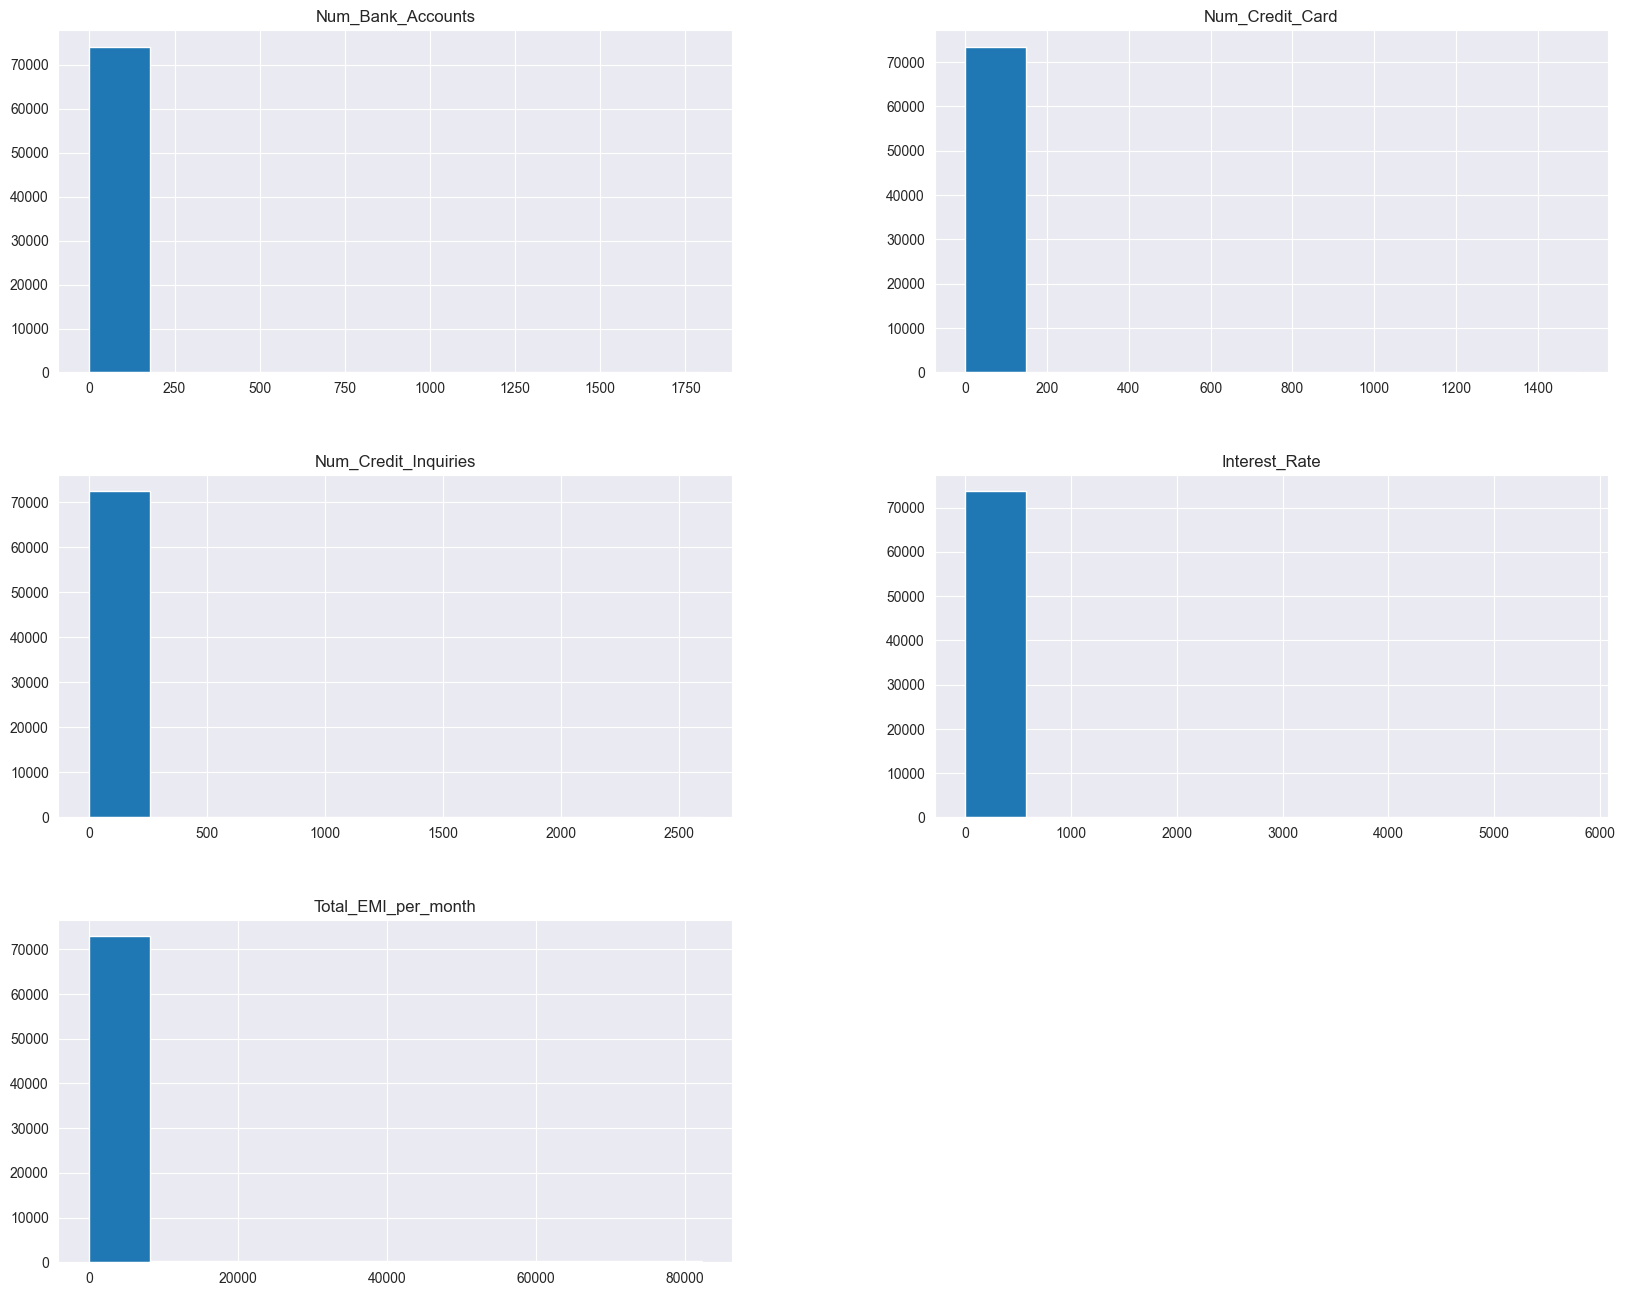

In [10]:
df[numerical_exp_columns].hist(figsize=[20, 16])

array([[<AxesSubplot:title={'center':'Annual_Income'}>,
        <AxesSubplot:title={'center':'Amount_invested_monthly'}>,
        <AxesSubplot:title={'center':'Num_of_Loan'}>],
       [<AxesSubplot:title={'center':'Num_Credit_Card'}>,
        <AxesSubplot:title={'center':'Num_Credit_Inquiries'}>,
        <AxesSubplot:title={'center':'Interest_Rate'}>],
       [<AxesSubplot:title={'center':'Total_EMI_per_month'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

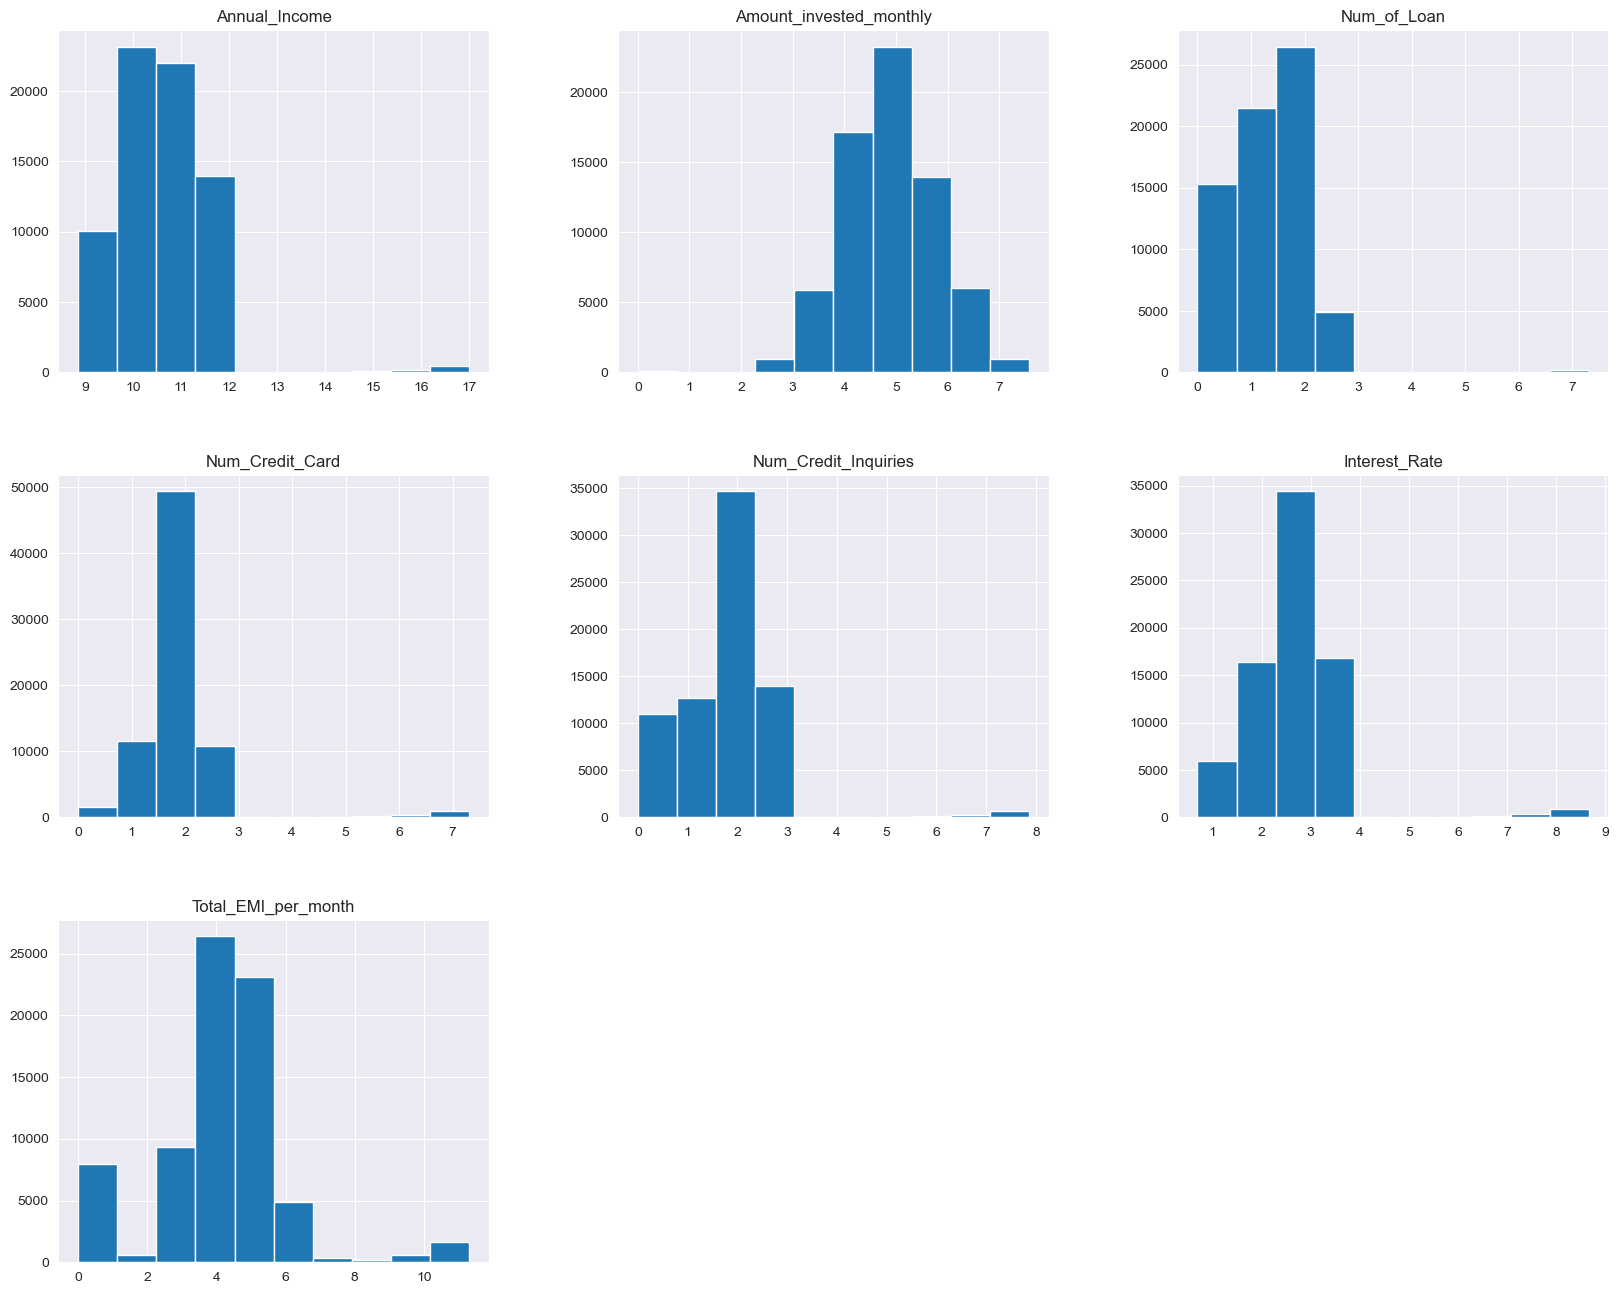

In [28]:
import numpy as np

df[numerical_exp_columns].apply(np.log1p).replace([-np.inf], pd.NA).hist(figsize=[20, 16])

In [29]:
df[categorical_columns].nunique()

Credit_Mix                4
Month                     8
Payment_Behaviour         7
Payment_of_Min_Amount     3
Occupation               16
dtype: int64

In [30]:
df[many_categories].nunique()

Type_of_Loan          6260
Credit_History_Age     404
dtype: int64

In [33]:
for f in numerical_columns + numerical_exp_columns:
    df[f] = pd.to_numeric(df[f], errors='coerce')
    df_test[f] = pd.to_numeric(df[f], errors='coerce')

In [34]:
df['Age'] = df['Age'].apply(lambda x: x if 0 < x < 100 else None)
df_test['Age'] = df_test['Age'].apply(lambda x: x if 0 < x < 100 else None)

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, TargetEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
import numpy as np


# Define the pipelines for each type of feature
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(fill_value='median')),
    ('scaler', StandardScaler())
])

numerical_exp_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transformer', FunctionTransformer(np.log1p)),
    ('inf_imputer', FunctionTransformer(partial(pd.DataFrame.replace, to_replace=[np.inf, -np.inf, pd.NA], value=None))),
    ('post_imputer', SimpleImputer(fill_value=-0.0001)),
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

multi_categorical_pipeline = Pipeline([
    ('target_encoder', TargetEncoder())
])

# Define which columns are processed by each pipeline
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_columns),
    ('num_exp', numerical_exp_pipeline, numerical_exp_columns),
    ('cat', categorical_pipeline, categorical_columns),
    # ('multi_cat', multi_categorical_pipeline, many_categories + categorical_columns)
]).set_output(transform='pandas')

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_function_transformer.py:345: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [36]:
# Apply the transformations
X_train = preprocessor.fit_transform(df, df[target])

D:\Anaconda\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
D:\Anaconda\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [37]:
X_test = preprocessor.transform(df_test)

# Fit

In [38]:
y_train = df[target]
y_train = y_train.map({'Standard': 0, 'Poor': 2, 'Good': 1})
y_test = df_test[target]
y_test = y_test.map({'Standard': 0, 'Poor': 2, 'Good': 1})

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, cohen_kappa_score, \
    classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import confusion_matrix




# Initialize models list
models = [
    ('Dummy', DummyClassifier(strategy="stratified", random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('LogisticRegression', LogisticRegression(random_state=42)),
    ('Ridge', RidgeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('NN', MLPClassifier(random_state=42))
]

# Initialize an empty list to store metrics
metrics_list = []

# Loop through models
for name, model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Initialize dict for this model's metrics
    model_metrics = {'Model': name}

    print('#' * 64)
    print(name)
    for dataset, X, y in [
        ('Train', X_train, y_train),
        ('Test', X_test, y_test),
    ]:
        # Make predictions
        y_pred = model.predict(X)
        try:
            y_prob = model.predict_proba(X)[:, 1]
        except AttributeError:
            print(f'Model {name} has no predict_proba. Hard prediction used')
            y_prob = y_pred

        # Compute metrics
        f1 = f1_score(y, y_pred, average='macro')
        precision = precision_score(y, y_pred, average='macro')
        recall = recall_score(y, y_pred, average='macro')
        # auc = roc_auc_score(y, y_prob, average='macro', multi_class='ovo')
        # kappa = cohen_kappa_score(y, y_pred, average='macro')

        print(dataset)
        print(classification_report(y, y_pred))
        print(confusion_matrix(y, y_pred))

        # Append metrics to dict
        model_metrics.update({
            f'{dataset}_F1_Score': f1,
            f'{dataset}_Precision': precision,
            f'{dataset}_Recall': recall,
            # f'{dataset}_AUC': auc,
            # f'{dataset}_Kappa': kappa
        })

    # Append model metrics to list
    metrics_list.append(model_metrics)

# Convert list of metrics to DataFrame
metrics_df = pd.DataFrame(metrics_list, index=[i[0] for i in models])

################################################################
Dummy
Train
              precision    recall  f1-score   support

           0       0.53      0.53      0.53     39881
           1       0.19      0.18      0.19     13371
           2       0.29      0.29      0.29     21748

    accuracy                           0.40     75000
   macro avg       0.34      0.34      0.34     75000
weighted avg       0.40      0.40      0.40     75000

[[21180  7042 11659]
 [ 6969  2466  3936]
 [11633  3766  6349]]
Test
              precision    recall  f1-score   support

           0       0.53      0.53      0.53     13293
           1       0.18      0.18      0.18      4457
           2       0.29      0.29      0.29      7250

    accuracy                           0.40     25000
   macro avg       0.33      0.33      0.33     25000
weighted avg       0.40      0.40      0.40     25000

[[6993 2382 3918]
 [2370  791 1296]
 [3913 1234 2103]]
#####################################

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


################################################################
NN
Train
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     39881
           1       0.66      0.66      0.66     13371
           2       0.71      0.75      0.73     21748

    accuracy                           0.74     75000
   macro avg       0.72      0.72      0.72     75000
weighted avg       0.74      0.74      0.74     75000

[[30132  3483  6266]
 [ 4066  8827   478]
 [ 4420  1020 16308]]
Test
              precision    recall  f1-score   support

           0       0.63      0.73      0.68     13293
           1       0.49      0.36      0.41      4457
           2       0.47      0.42      0.44      7250

    accuracy                           0.57     25000
   macro avg       0.53      0.50      0.51     25000
weighted avg       0.56      0.57      0.56     25000

[[9688 1126 2479]
 [1892 1587  978]
 [3723  509 3018]]


In [42]:
metrics_df

,Model,Train_F1_Score,Train_Precision,Train_Recall,Test_F1_Score,Test_Precision,Test_Recall
Dummy,Dummy,0.335822,0.335835,0.335815,0.331204,0.331213,0.331203
RandomForest,RandomForest,0.999988,0.999992,0.999985,0.566974,0.583190,0.580472
LightGBM,LightGBM,0.735422,0.735037,0.738355,0.504875,0.553919,0.491345
XGBoost,XGBoost,0.812378,0.811267,0.813710,0.456356,0.515229,0.449573
LogisticRegression,LogisticRegression,0.591373,0.604178,0.589593,0.327080,0.407142,0.379090
Ridge,Ridge,0.593949,0.600879,0.600974,0.418469,0.429432,0.494283
KNN,KNN,0.751569,0.770706,0.737493,0.464577,0.509231,0.454233
NN,NN,0.718971,0.716631,0.721857,0.510231,0.530577,0.500383


In [44]:
metrics_df[[i for i in metrics_df if 'Test' in i]]

,Test_F1_Score,Test_Precision,Test_Recall
Dummy,0.331204,0.331213,0.331203
RandomForest,0.566974,0.583190,0.580472
LightGBM,0.504875,0.553919,0.491345
XGBoost,0.456356,0.515229,0.449573
LogisticRegression,0.327080,0.407142,0.379090
Ridge,0.418469,0.429432,0.494283
KNN,0.464577,0.509231,0.454233
NN,0.510231,0.530577,0.500383


# Investigate models

In [51]:
import eli5

In [52]:
eli5.explain_weights_df(models[1][1], feature_names = list(X_train.columns))

,feature,weight,std
0,num__Outstanding_Debt,0.102459,0.035400
1,num_exp__Interest_Rate,0.080493,0.034979
2,num__Delay_from_due_date,0.058775,0.018137
3,num__Changed_Credit_Limit,0.056873,0.005818
4,num__Monthly_Balance,0.043029,0.004319
5,num_exp__Num_Credit_Card,0.042341,0.012252
6,num_exp__Amount_invested_monthly,0.041783,0.001733
7,num_exp__Annual_Income,0.041701,0.004176
8,num_exp__Total_EMI_per_month,0.041397,0.002437
9,num__Credit_Utilization_Ratio,0.040763,0.001582


In [53]:
eli5.explain_weights_df(models[4][1], feature_names = list(X_train.columns))

,target,feature,weight
0,0,cat__Credit_Mix_Standard,0.572907
1,0,<BIAS>,0.431012
2,0,cat__Credit_Mix_Bad,0.347810
3,0,cat__Payment_of_Min_Amount_Yes,0.224076
4,0,num__Changed_Credit_Limit,0.188868
...,...,...,...
160,2,cat__Payment_Behaviour_High_spent_Medium_value...,-0.145532
161,2,cat__Credit_Mix__,-0.186671
162,2,num__Changed_Credit_Limit,-0.256165
163,2,cat__Payment_Behaviour_High_spent_Large_value_...,-0.266676


# CNN

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert numpy arrays to PyTorch tensors
y_cnn_train = y_train.map({0: 0, 1:0, 2:1})
y_cnn_test = y_test.map({0: 0, 1:0, 2:1})

X_tensor = torch.tensor(X_train.copy().values, dtype=torch.float32)
y = torch.tensor(y_cnn_train.copy().values, dtype=torch.float32)

# Convert to 1D CNN format (N, C, L) - N samples, C channels, L length
X = X_tensor.unsqueeze(1)  # Now shape is [100, 1, 10]

# Create dataset and dataloader
dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

# Define a simple CNN model for tabular data
class TabularCNN(nn.Module):
    def __init__(self):
        super(TabularCNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(832, 1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.fc1(x)
        return x



In [55]:
X.shape

torch.Size([75000, 1, 54])

In [56]:
# Initialize model, loss function, and optimizer
model = TabularCNN()
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [57]:
# Training loop
for epoch in range(5):  # 5 epochs for simplicity
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets.float())
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')


Epoch 1, Loss: 0.4289875030517578
Epoch 2, Loss: 0.45614713430404663
Epoch 3, Loss: 0.4220665395259857
Epoch 4, Loss: 0.47596389055252075
Epoch 5, Loss: 0.18150433897972107


# Evaluate

In [58]:
X_tensor_test = torch.tensor(X_test.copy().values, dtype=torch.float32)
y_tensor_test = torch.tensor(y_cnn_test.copy().values, dtype=torch.float32)

# Create dataset and dataloader
dataset_test = TensorDataset(X_tensor_test.unsqueeze(1), y_tensor_test)
test_loader = DataLoader(dataset_test, batch_size=10, shuffle=True)

In [59]:
# Assuming you have a DataLoader for your test set named test_loader
model.eval()  # Set the model to evaluation mode
y_true = []
y_pred = []

with torch.no_grad():
    for inputs, labels in test_loader:  # dataloader
        outputs = model(inputs)
        predictions = torch.round(torch.sigmoid(outputs))
        y_true.extend(labels.tolist())
        y_pred.extend(predictions.squeeze().tolist())

In [60]:
f1 = f1_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')

print(dataset)
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))


              precision    recall  f1-score   support

         0.0       0.71      0.97      0.82     17750
         1.0       0.18      0.02      0.03      7250

    accuracy                           0.69     25000
   macro avg       0.44      0.49      0.42     25000
weighted avg       0.55      0.69      0.59     25000

[[17170   580]
 [ 7120   130]]


In [230]:
f1 = f1_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
# auc = roc_auc_score(y, y_prob, average='macro', multi_class='ovo')
# kappa = cohen_kappa_score(y, y_pred, average='macro')

print(dataset)
print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))

# Append metrics to dict
# model_metrics.update({
#     f'{dataset}_F1_Score': f1,
#     f'{dataset}_Precision': precision,
#     f'{dataset}_Recall': recall,
#     # f'{dataset}_AUC': auc,
#     # f'{dataset}_Kappa': kappa
# })

              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75     17750
         1.0       0.23      0.14      0.18      7250

    accuracy                           0.62     25000
   macro avg       0.47      0.48      0.46     25000
weighted avg       0.56      0.62      0.58     25000

[[14398  3352]
 [ 6232  1018]]
